# Aprofundando nas Previsões

In [1]:
! pip install prophet==1.1.5 plotly

In [9]:
import pandas as pd
from prophet import Prophet
from matplotlib import pyplot as plt

CSV_PATH_BR_LAND_TEMP = './data/processed/brazil_land_temp.csv'

df_br = pd.read_csv(CSV_PATH_BR_LAND_TEMP, 
                    parse_dates=['dt'])

df_br.head()

dt  AverageTemperature  AverageTemperatureUncertainty Country  Month
0 1832-01-01              24.935                          1.372  Brazil      1
1 1832-02-01              24.505                          1.953  Brazil      2
2 1832-03-01              24.617                          1.359  Brazil      3
3 1832-04-01              23.990                          2.013  Brazil      4
4 1832-05-01              23.124                          1.592  Brazil      5

In [14]:
df_train = pd.DataFrame()

df_train['ds'] = df_br.loc[:2000 - 1, 'dt']
df_train['y'] = df_br.loc[:2000 - 1, 'AverageTemperature']

print(df_train.shape)
df_train.head()

(2000, 2)


ds       y
0 1832-01-01  24.935
1 1832-02-01  24.505
2 1832-03-01  24.617
3 1832-04-01  23.990
4 1832-05-01  23.124

In [15]:
df_test = pd.DataFrame()

df_test['ds'] = df_br.loc[2000:, 'dt']
df_test['y'] = df_br.loc[2000:, 'AverageTemperature']

print(df_test.shape)
df_test.head()

(164, 2)


ds       y
2000 2000-01-01  25.653
2001 2000-02-01  25.463
2002 2000-03-01  25.446
2003 2000-04-01  25.102
2004 2000-05-01  24.614

In [17]:
model = Prophet()

model.fit(df_train)

df_future = model.make_future_dataframe(periods=150,
                                        freq='M')

predicions = model.predict(df_future)

predicions.head()

14:58:38 - cmdstanpy - INFO - Chain [1] start processing
14:58:39 - cmdstanpy - INFO - Chain [1] done processing


ds      trend  ...  multiplicative_terms_upper       yhat
0 1832-01-01  23.959367  ...                         0.0  24.567128
1 1832-02-01  23.960482  ...                         0.0  24.552231
2 1832-03-01  23.961524  ...                         0.0  24.330724
3 1832-04-01  23.962639  ...                         0.0  23.815634
4 1832-05-01  23.963718  ...                         0.0  23.179742

[5 rows x 16 columns]

/opt/conda/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Text(116.97222222222221, 0.5, 'Temperatura')

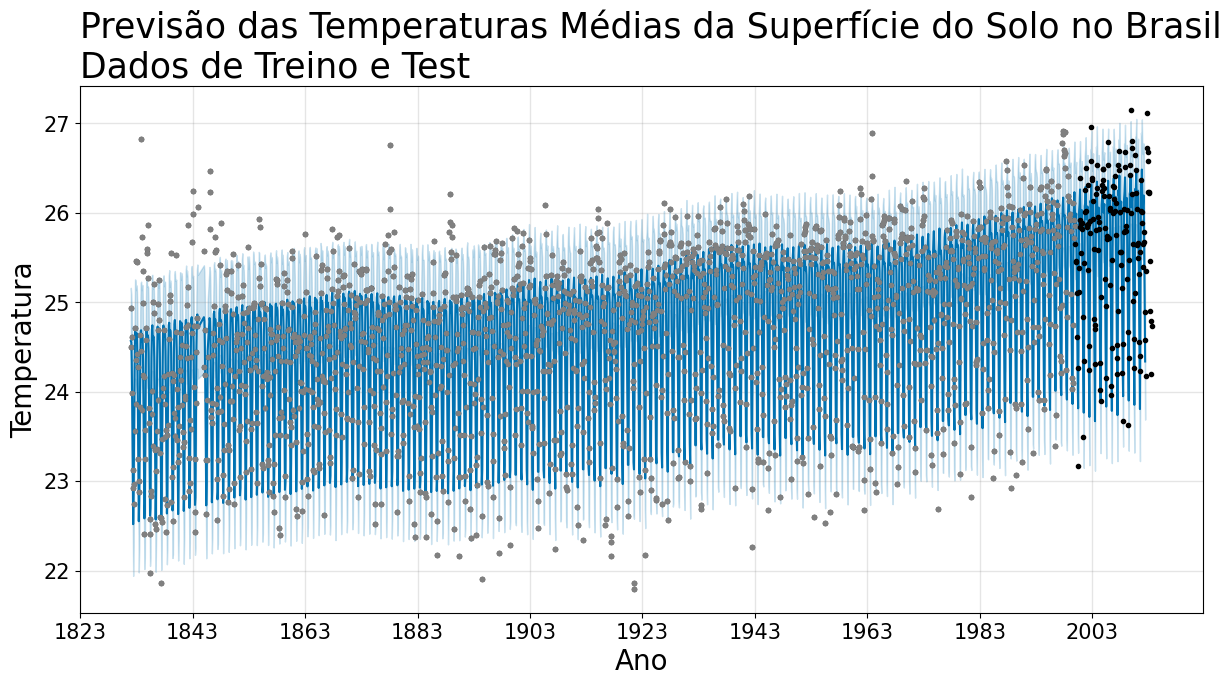

In [20]:
fig = model.plot(predicions,
                 figsize=(12, 6))

plt.title('Previsão das Temperaturas Médias da Superfície do Solo'
          ' no Brasil\nDados de Treino e Test',
          loc='left',
          fontsize=25)

plt.plot(df_train['ds'],
         df_train['y'],
         '.',
         color='grey')

plt.plot(df_test['ds'],
         df_test['y'],
         '.',
         color='black')

ax.axvline(x=df_train['ds'].max(),
           c='dimgray',
           lw=3,
           alpha=.9,
           ls='-')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('Ano',
           fontsize=20)

plt.ylabel('Temperatura',
           fontsize=20)

/opt/conda/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

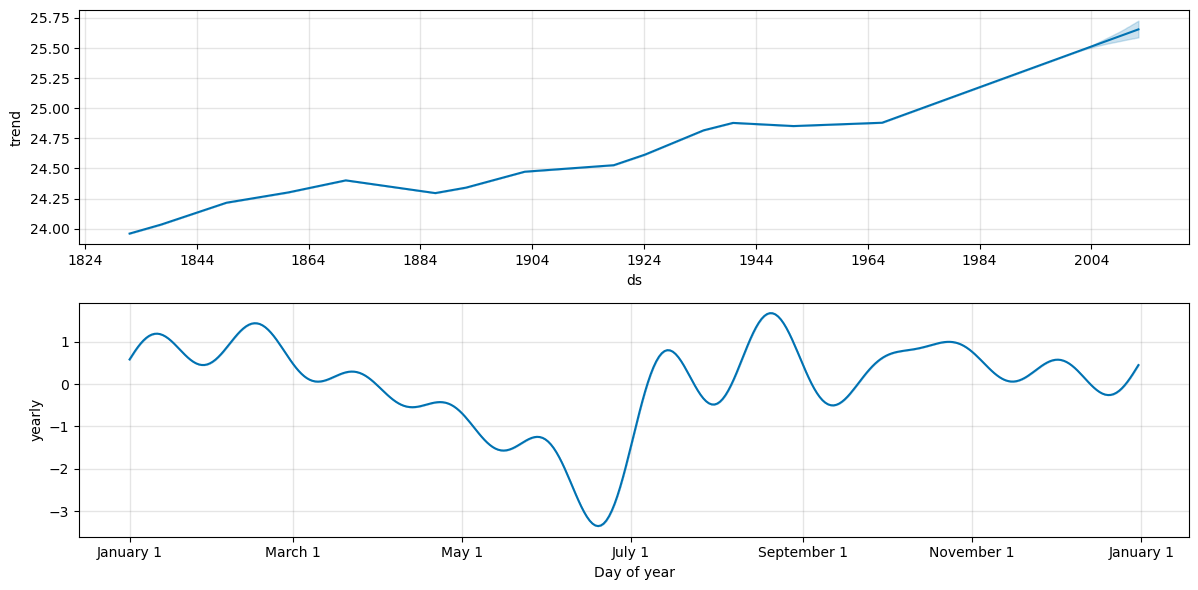

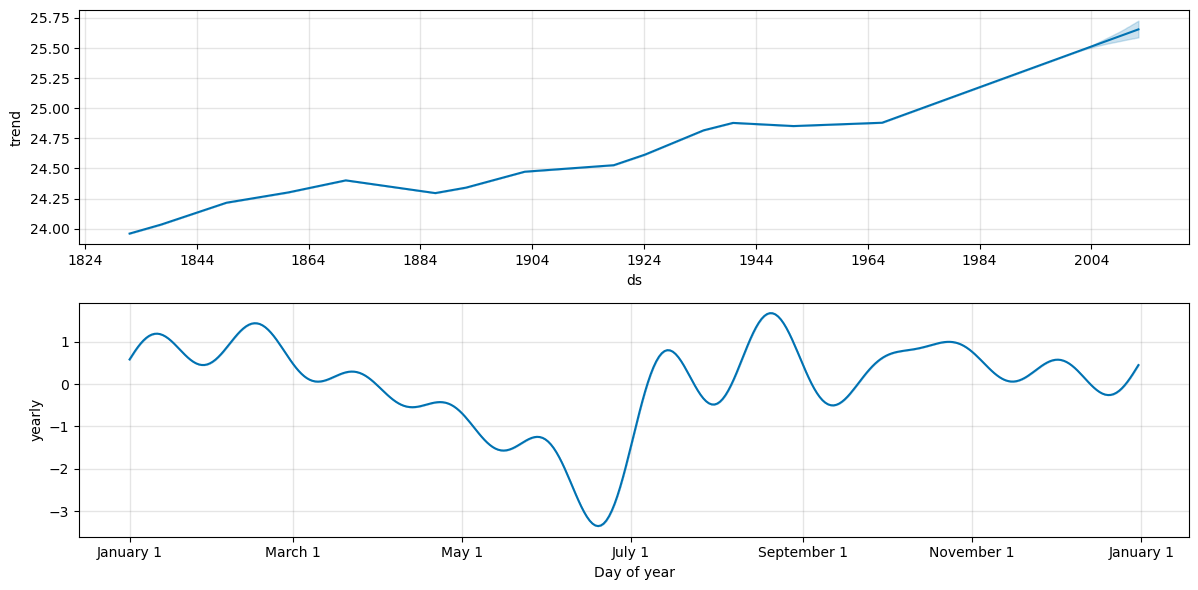

In [21]:
model.plot_components(predicions,
                      figsize=(12, 6))

## Previsão de crescimento

In [23]:
CSV_URL_COVID_SP = 'https://raw.githubusercontent.com/allanspadini/livro-val-allan/main/covid_sp.csv'

df_covid = pd.read_csv(CSV_URL_COVID_SP)

df_covid.head()

epidemiological_week        date  ...  is_last is_repeated
0                202205  2022-01-31  ...    False        True
1                202205  2022-01-30  ...    False        True
2                202204  2022-01-29  ...    False        True
3                202204  2022-01-28  ...    False        True
4                202204  2022-01-27  ...    False        True

[5 rows x 16 columns]

In [24]:
df_covid['date'] = pd.to_datetime(df_covid['date'],
                                  format='%Y-%m-%d')

df_covid.head()

epidemiological_week       date  ...  is_last is_repeated
0                202205 2022-01-31  ...    False        True
1                202205 2022-01-30  ...    False        True
2                202204 2022-01-29  ...    False        True
3                202204 2022-01-28  ...    False        True
4                202204 2022-01-27  ...    False        True

[5 rows x 16 columns]

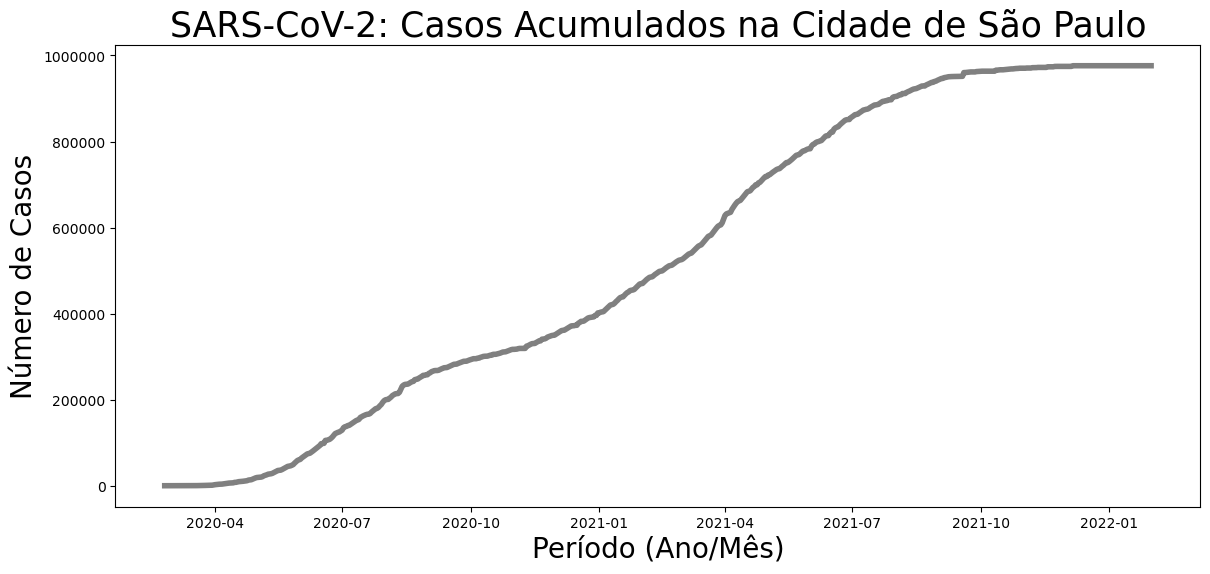

In [28]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (14, 6))

sns.lineplot(df_covid,
             x='date', 
             y='last_available_confirmed',
             lw=4, 
             color='grey')

plt.title('SARS-CoV-2: Casos Acumulados na '
          'Cidade de São Paulo',
          fontsize = 25)

plt.ylabel('Número de Casos', 
           fontsize= 20)
plt.xlabel('Período (Ano/Mês)', 
           fontsize= 20)

plt.ticklabel_format(style='plain', axis='y')

In [29]:
df_covid_pred = pd.DataFrame()

df_covid_pred['ds'] = df_covid['date']
df_covid_pred['y'] = df_covid['last_available_confirmed']

df_covid_pred.head()

ds       y
0 2022-01-31  976214
1 2022-01-30  976214
2 2022-01-29  976214
3 2022-01-28  976214
4 2022-01-27  976214

In [37]:
df_covid_pred['cap'] = int(1e6)

df_covid_pred.head()

ds       y      cap
0 2022-01-31  976214  1000000
1 2022-01-30  976214  1000000
2 2022-01-29  976214  1000000
3 2022-01-28  976214  1000000
4 2022-01-27  976214  1000000

In [40]:
model = Prophet(growth='logistic')

model.fit(df_covid_pred)

df_future = model.make_future_dataframe(periods=30)

df_future['cap'] = int(1e6)

predicions = model.predict(df_future)

predicions.head()

15:14:02 - cmdstanpy - INFO - Chain [1] start processing
15:14:02 - cmdstanpy - INFO - Chain [1] done processing


ds        trend  ...  multiplicative_terms_upper         yhat
0 2020-02-25  4914.838754  ...                         0.0  4424.216256
1 2020-02-26  5046.099433  ...                         0.0  4947.155056
2 2020-02-27  5180.847442  ...                         0.0  5518.142655
3 2020-02-28  5319.174443  ...                         0.0  5956.364663
4 2020-02-29  5461.174458  ...                         0.0  6025.633899

[5 rows x 17 columns]

/opt/conda/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


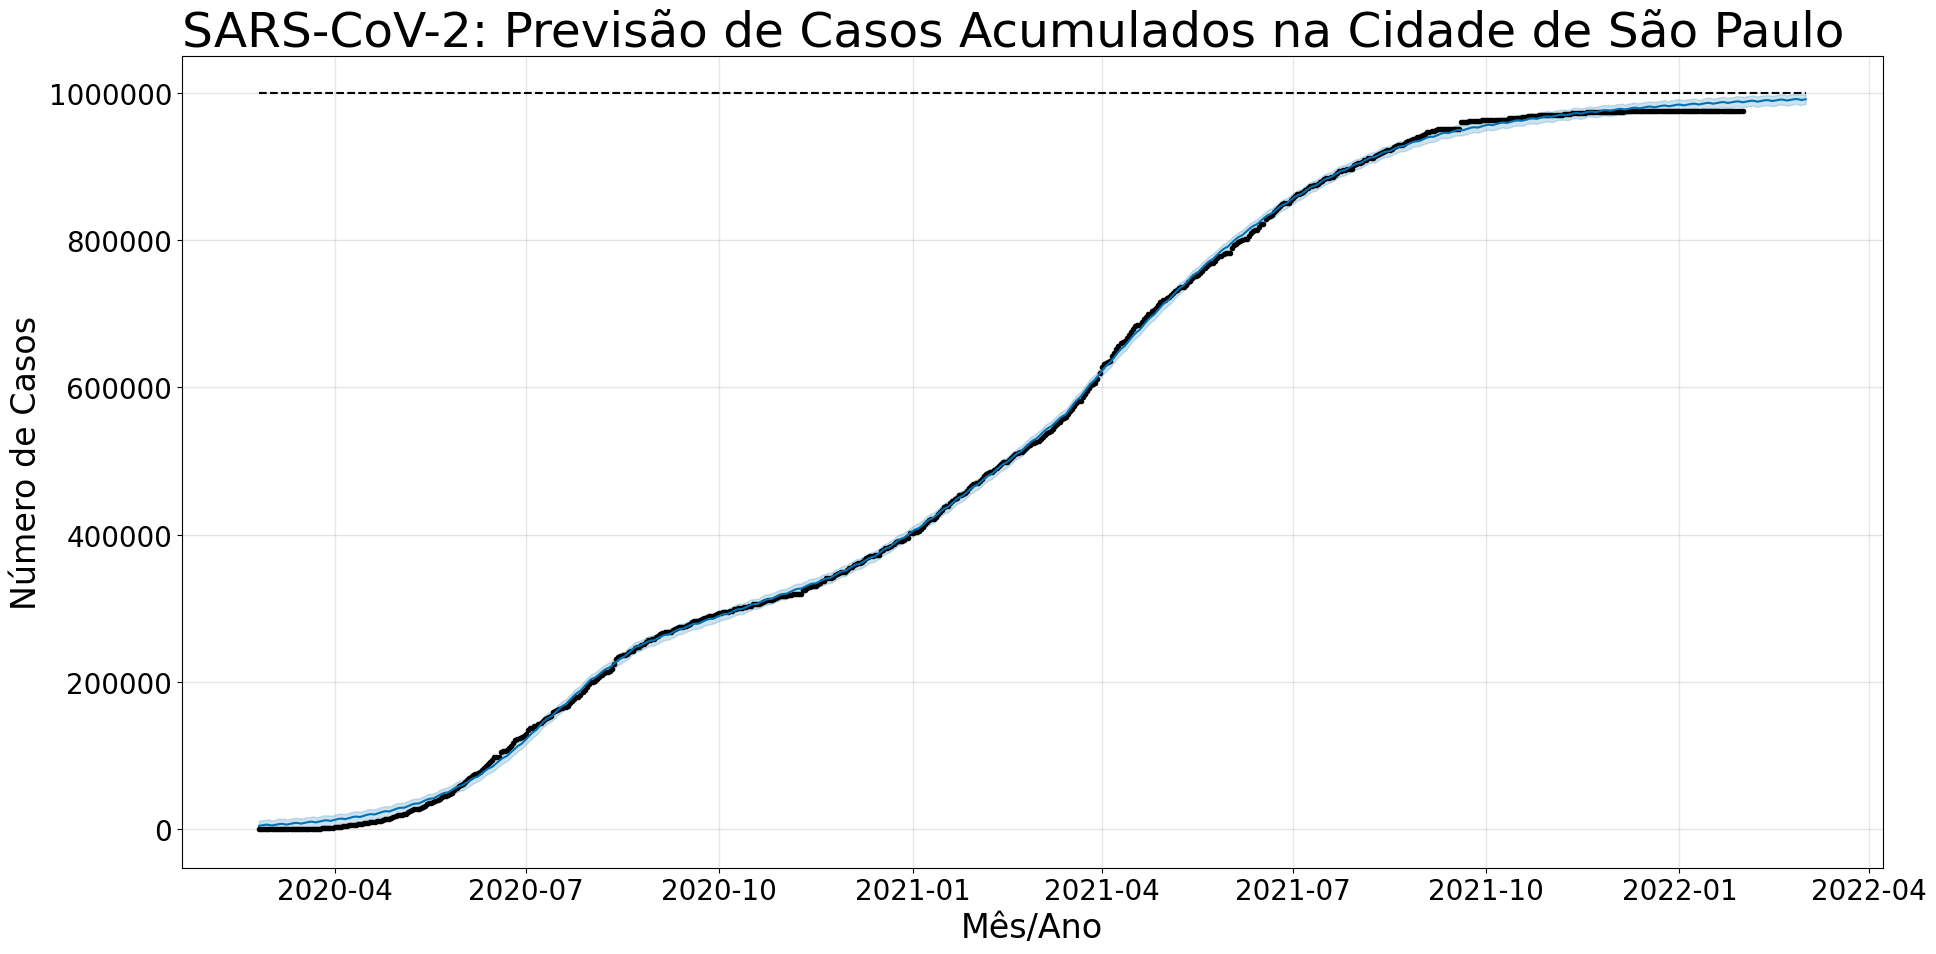

In [43]:
model.plot(predicions, 
           figsize=(18,9))

plt.title('SARS-CoV-2: Previsão de Casos Acumulados '
          'na Cidade de São Paulo', 
          loc = 'left', 
          fontsize = 35)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('Mês/Ano', 
           fontsize=24)
plt.ylabel('Número de Casos', 
           fontsize=24)

plt.ticklabel_format(style='plain', axis='y')

## Changepoints

In [57]:
CSV_PATH_BR_LAND_TEMP = './data/processed/brazil_land_temp.csv'

df_br = pd.read_csv(CSV_PATH_BR_LAND_TEMP, 
                    parse_dates=['dt'])

df = df_br[['dt', 'AverageTemperature']]
df.columns = ['ds', 'y']

df_train = pd.DataFrame()

df_train['ds'] = df_br.loc[:2000 - 1, 'dt']
df_train['y'] = df_br.loc[:2000 - 1, 'AverageTemperature']

print(df_train.shape)
df_train.head()

(2000, 2)


ds       y
0 1832-01-01  24.935
1 1832-02-01  24.505
2 1832-03-01  24.617
3 1832-04-01  23.990
4 1832-05-01  23.124

In [59]:
model = Prophet()

model.fit(df_train)

df_future = model.make_future_dataframe(periods=120, freq='M')

predicions = model.predict(df_future)

15:27:59 - cmdstanpy - INFO - Chain [1] start processing
15:27:59 - cmdstanpy - INFO - Chain [1] done processing


/opt/conda/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Text(0.5, 36.72222222222221, 'Temperatura')

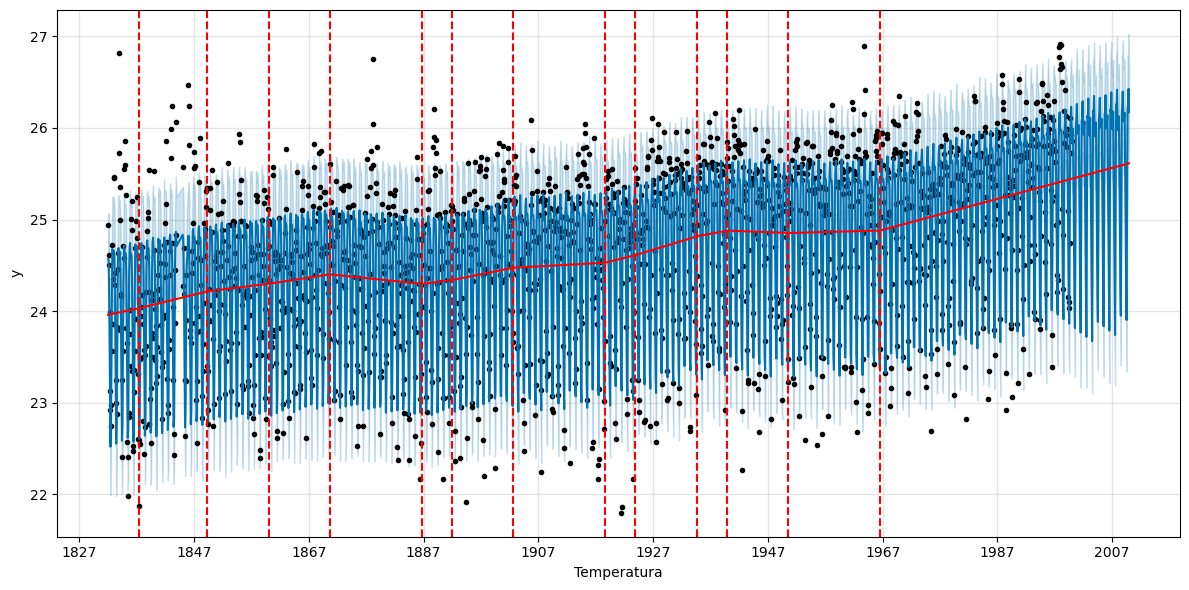

In [60]:
from prophet.plot import add_changepoints_to_plot

fig = model.plot(predicions, 
                 figsize=(12, 6))

a = add_changepoints_to_plot(fig.gca(),
                             model,
                             predicions)

plt.xlabel('Ano')
plt.xlabel('Temperatura')

/opt/conda/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

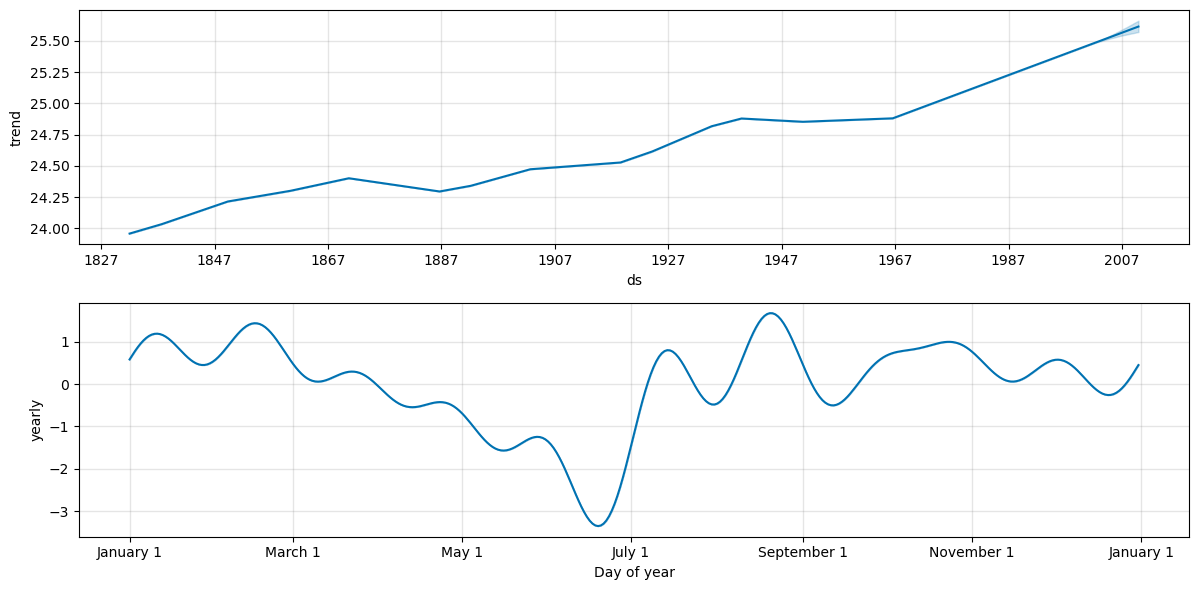

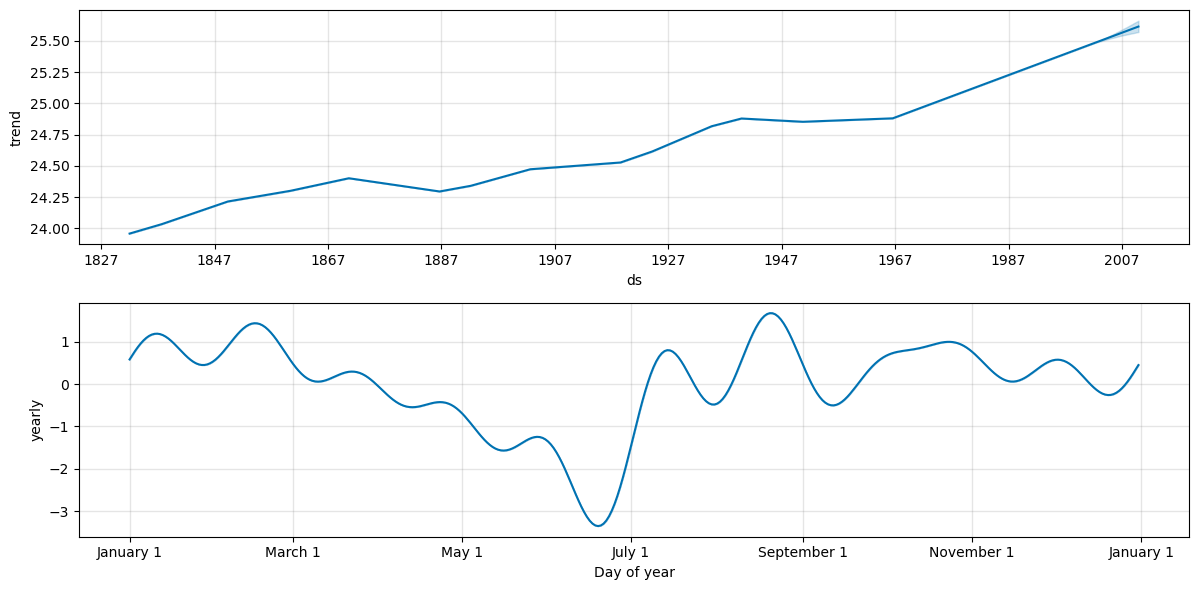

In [62]:
model.plot_components(predicions, figsize=(12, 6))

In [63]:
model = Prophet(n_changepoints=5)

model.fit(df_train)

df_future = model.make_future_dataframe(periods=150, freq='M')

predicions = model.predict(df_future)

predicions.head()

15:28:13 - cmdstanpy - INFO - Chain [1] start processing
15:28:13 - cmdstanpy - INFO - Chain [1] done processing


ds      trend  ...  multiplicative_terms_upper       yhat
0 1832-01-01  23.989007  ...                         0.0  24.596963
1 1832-02-01  23.990016  ...                         0.0  24.582156
2 1832-03-01  23.990960  ...                         0.0  24.359224
3 1832-04-01  23.991969  ...                         0.0  23.844656
4 1832-05-01  23.992945  ...                         0.0  23.209583

[5 rows x 16 columns]

/opt/conda/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Text(0.5, 36.72222222222221, 'Temperatura')

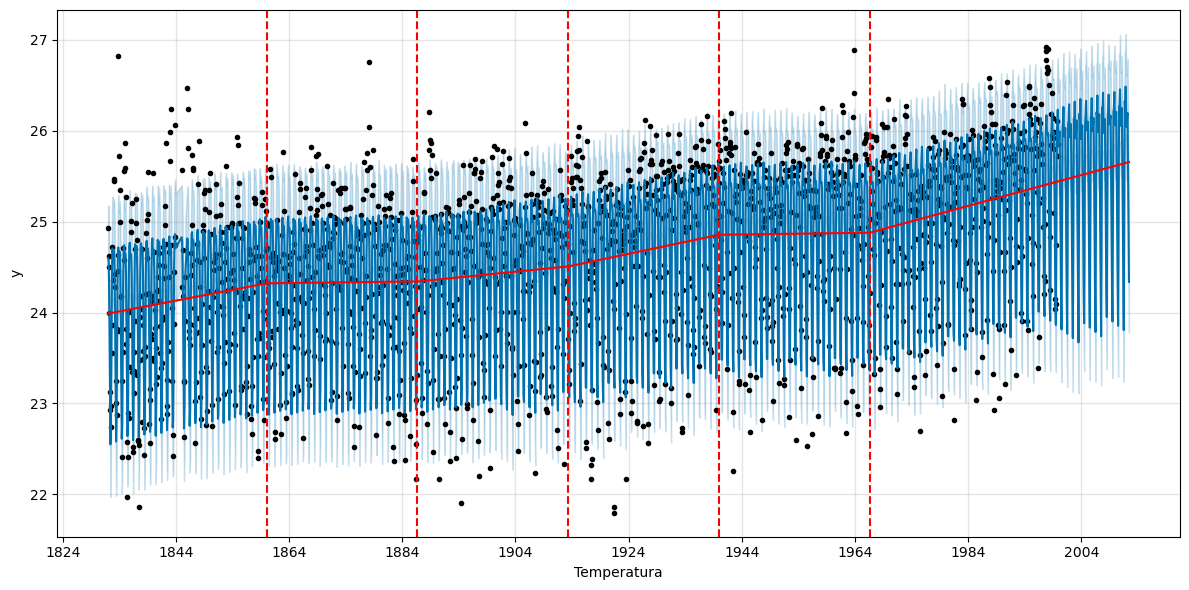

In [64]:
fig = model.plot(predicions, 
                 figsize=(12, 6))

a = add_changepoints_to_plot(fig.gca(),
                             model,
                             predicions)

plt.xlabel('Ano')
plt.xlabel('Temperatura')

/opt/conda/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

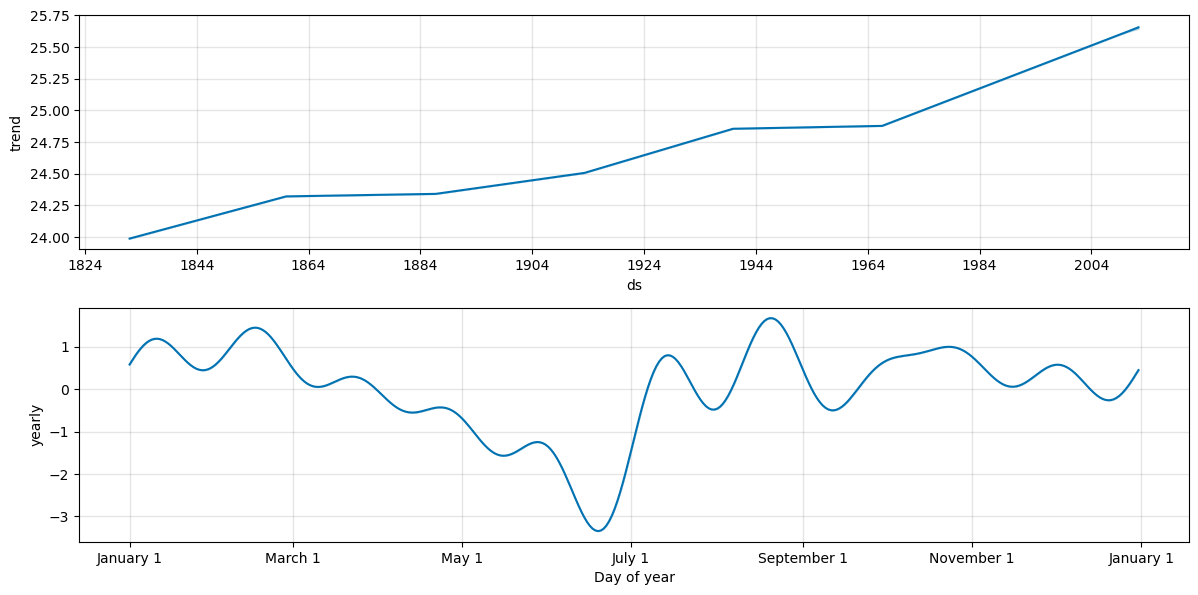

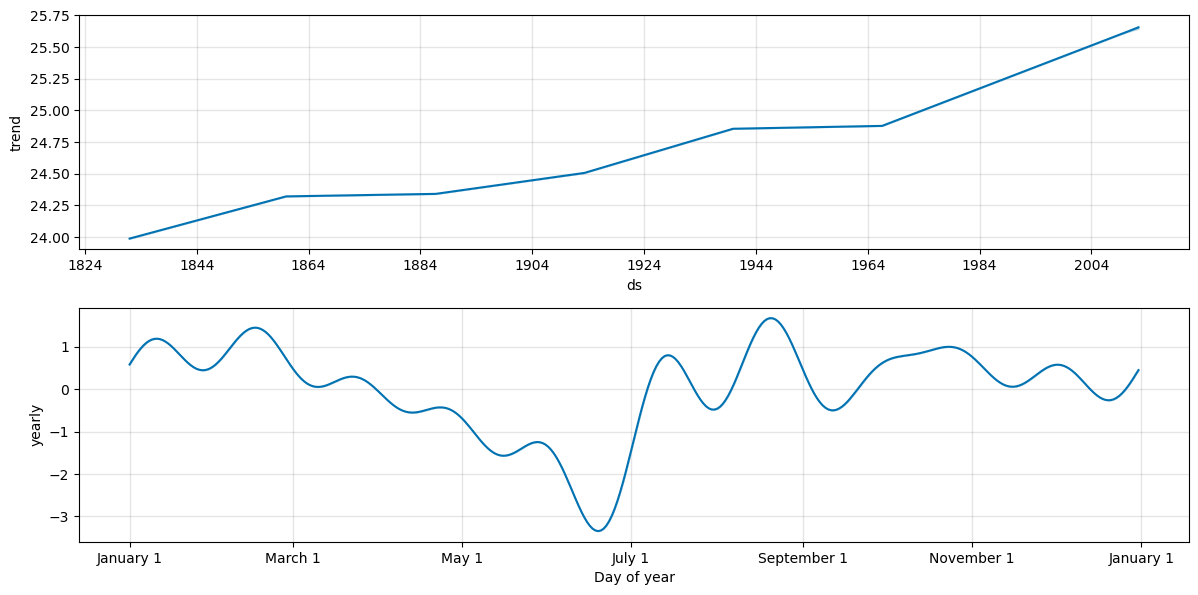

In [65]:
model.plot_components(predicions, figsize=(12, 6))

In [66]:
# "O padrão desse argumento é
# 0.80. Isso significa que o modelo não se ajustará a nenhuma
# mudança de tendência nos últimos 20% da série temporal para
# manter a tendência geral da série." pg. 43
model = Prophet(n_changepoints=5, changepoint_range=.9)

model.fit(df_train)

df_future = model.make_future_dataframe(periods=150, freq='M')

predicions = model.predict(df_future)

predicions.head()

15:28:26 - cmdstanpy - INFO - Chain [1] start processing
15:28:26 - cmdstanpy - INFO - Chain [1] done processing


ds      trend  ...  multiplicative_terms_upper       yhat
0 1832-01-01  23.999372  ...                         0.0  24.607256
1 1832-02-01  24.000282  ...                         0.0  24.592262
2 1832-03-01  24.001133  ...                         0.0  24.370408
3 1832-04-01  24.002044  ...                         0.0  23.855159
4 1832-05-01  24.002925  ...                         0.0  23.219260

[5 rows x 16 columns]

/opt/conda/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


(array([21., 22., 23., 24., 25., 26., 27., 28.]),
 [Text(0, 21.0, '21'),
  Text(0, 22.0, '22'),
  Text(0, 23.0, '23'),
  Text(0, 24.0, '24'),
  Text(0, 25.0, '25'),
  Text(0, 26.0, '26'),
  Text(0, 27.0, '27'),
  Text(0, 28.0, '28')])

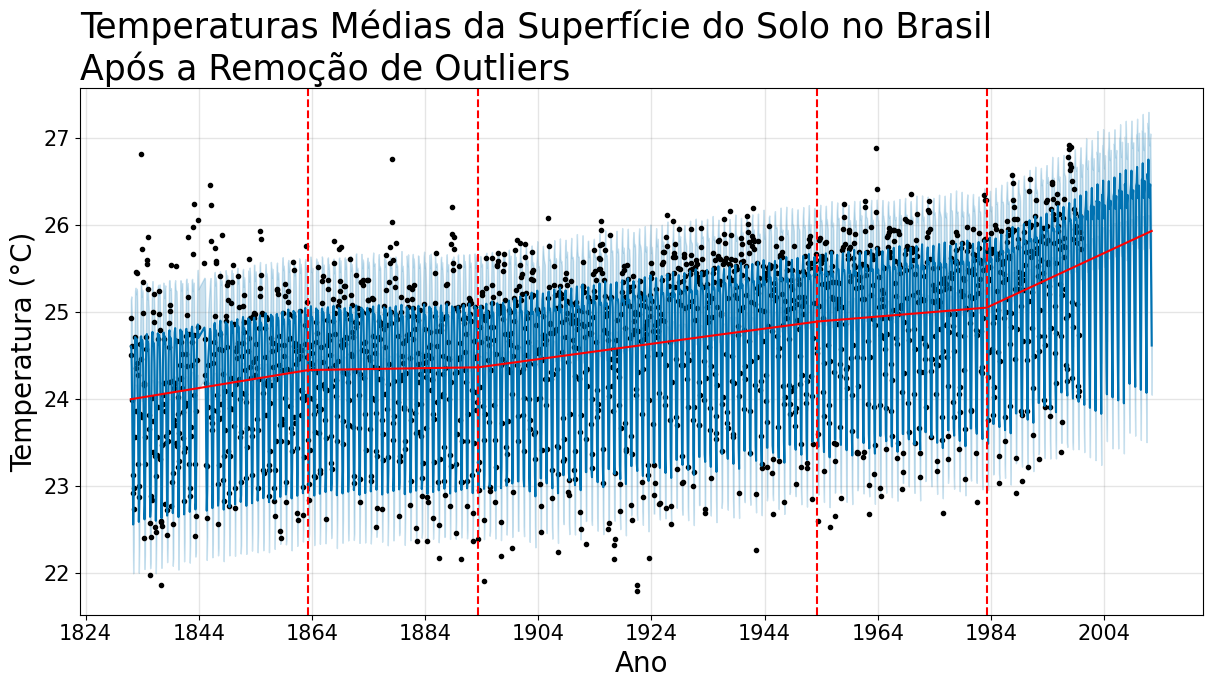

In [68]:
fig = model.plot(predicions, figsize=(12,6))

a = add_changepoints_to_plot(fig.gca(),
                             model,
                             predicions)

plt.title('Temperaturas Médias da Superfície do Solo '
          'no Brasil \nApós a Remoção de Outliers', 
          loc='left', 
          fontsize=25)

plt.xlabel('Ano', fontsize=20)
plt.ylabel('Temperatura (°C)', fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

/opt/conda/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

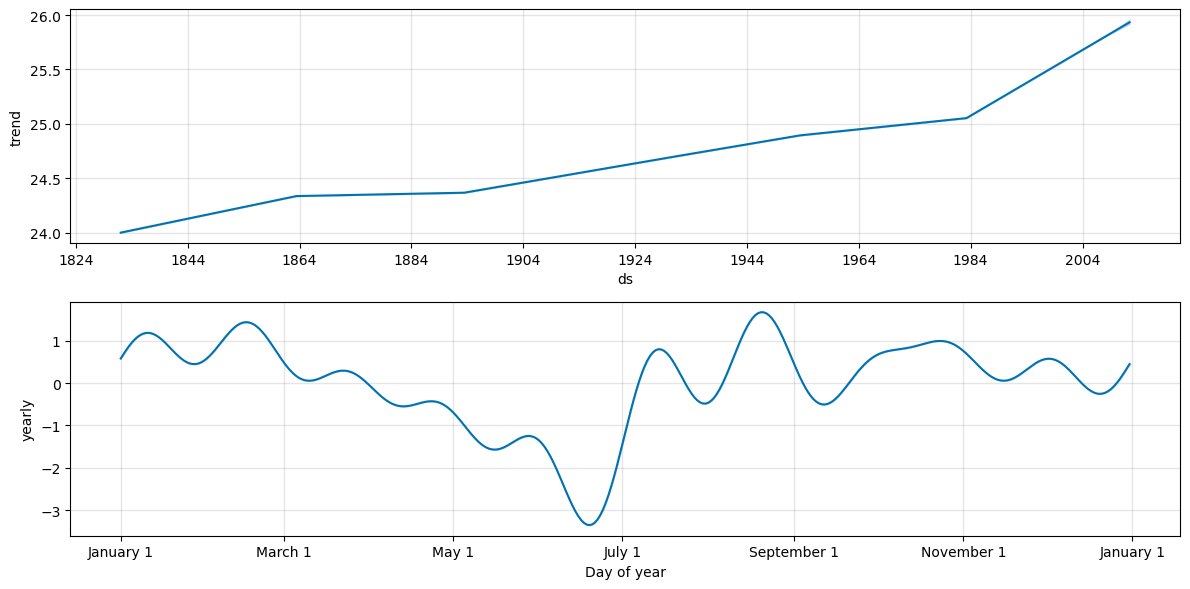

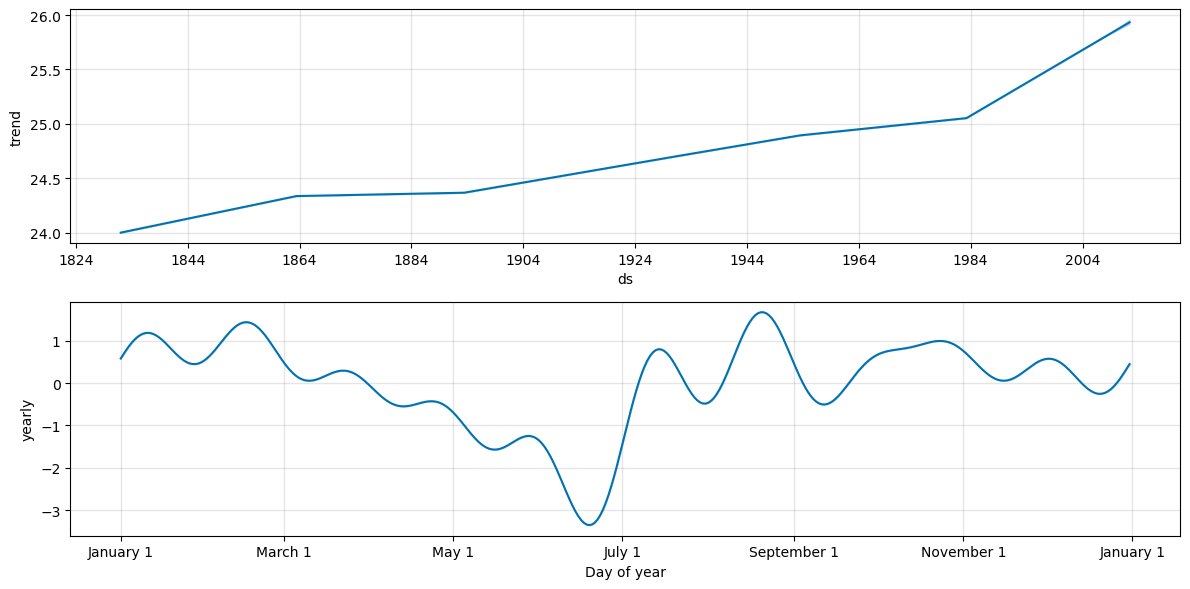

In [69]:
model.plot_components(predicions, figsize=(12, 6))

In [70]:
# Por padrão, esse parâmetro é
# definido como 0.05. Aumentá-lo 
# tornará a tendência mais flexível.
model = Prophet(changepoint_prior_scale=10)

model.fit(df_train)

df_future = model.make_future_dataframe(periods=150, freq='M')

predicions = model.predict(df_future)

predicions.head()

15:31:05 - cmdstanpy - INFO - Chain [1] start processing
15:31:06 - cmdstanpy - INFO - Chain [1] done processing


ds      trend  ...  multiplicative_terms_upper       yhat
0 1832-01-01  24.346922  ...                         0.0  24.952457
1 1832-02-01  24.335420  ...                         0.0  24.925435
2 1832-03-01  24.324660  ...                         0.0  24.694038
3 1832-04-01  24.313159  ...                         0.0  24.165831
4 1832-05-01  24.302028  ...                         0.0  23.517664

[5 rows x 16 columns]

/opt/conda/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Text(116.97222222222221, 0.5, 'Temperatura')

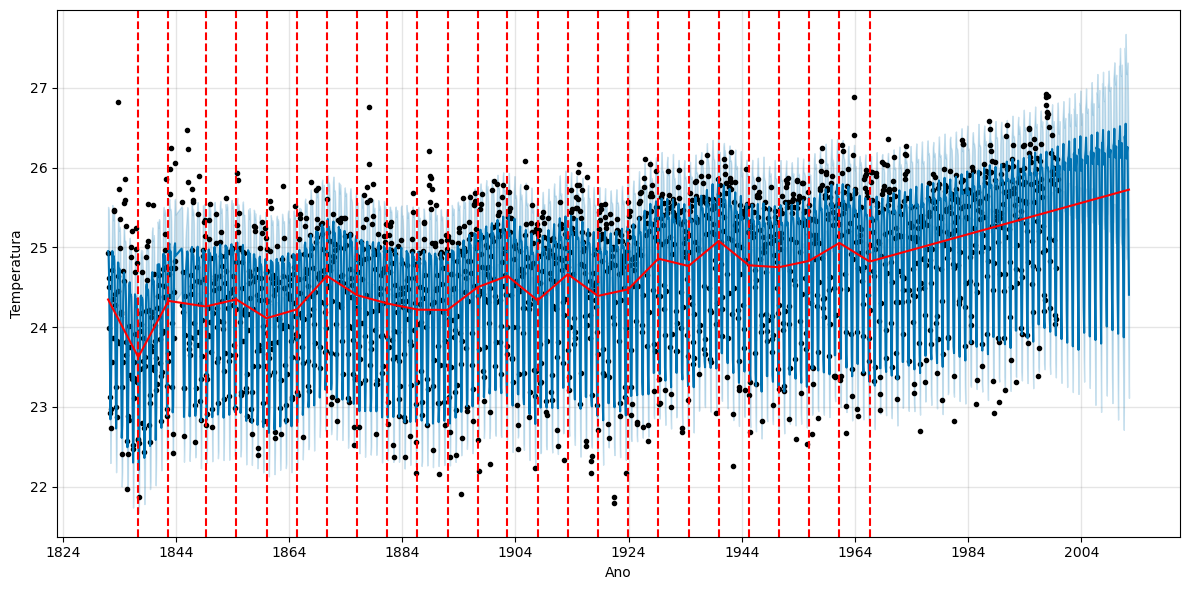

In [71]:
fig = model.plot(predicions, figsize=(12, 6))

a = add_changepoints_to_plot(fig.gca(), model, predicions)

plt.xlabel('Ano')
plt.ylabel('Temperatura')

/opt/conda/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

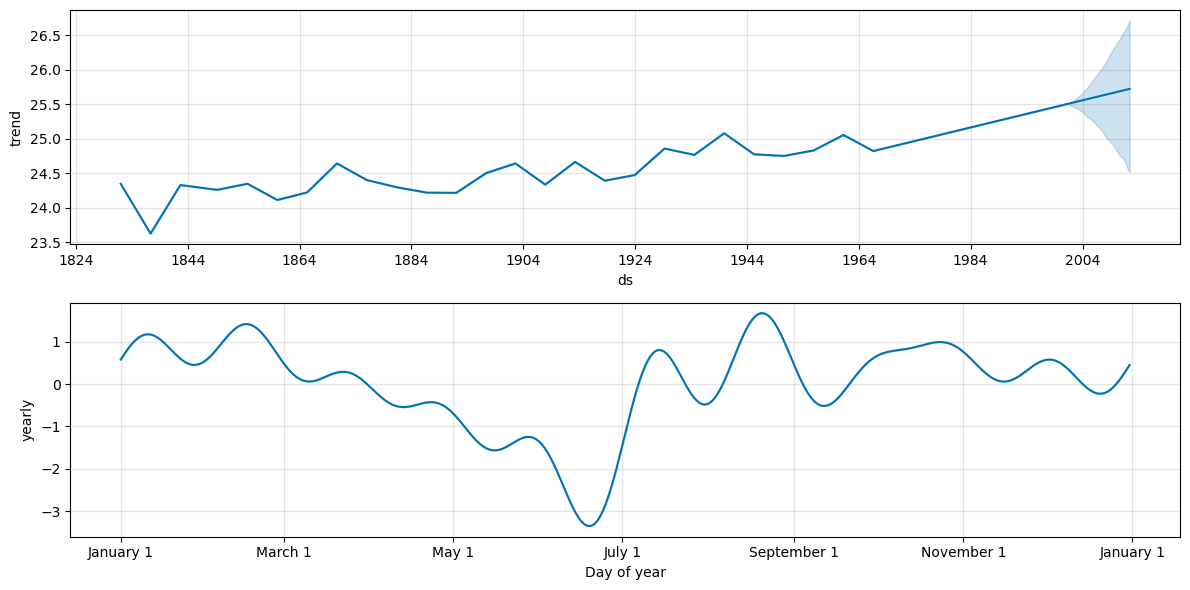

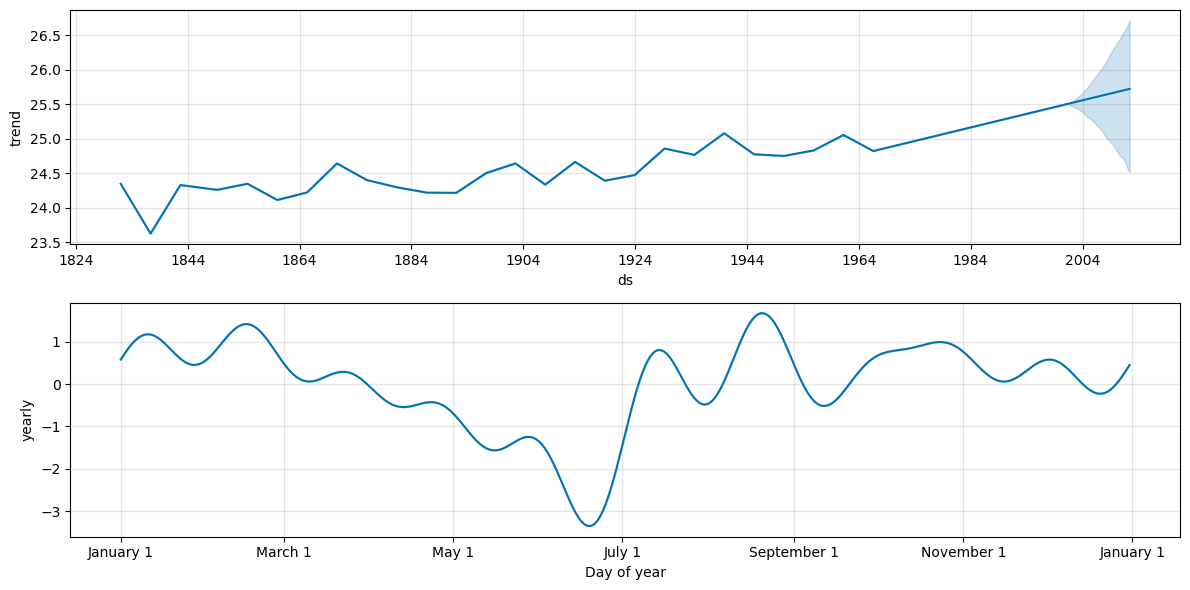

In [72]:
model.plot_components(predicions, figsize=(12, 6))

In [73]:
model = Prophet(changepoints=['1980-01-01'])

model.fit(df_train)

df_future = model.make_future_dataframe(periods=150, freq='M')

predicions = model.predict(df_future)

predicions.head()

15:33:34 - cmdstanpy - INFO - Chain [1] start processing
15:33:34 - cmdstanpy - INFO - Chain [1] done processing


ds      trend  ...  multiplicative_terms_upper       yhat
0 1832-01-01  24.043549  ...                         0.0  24.651205
1 1832-02-01  24.044111  ...                         0.0  24.635797
2 1832-03-01  24.044636  ...                         0.0  24.413855
3 1832-04-01  24.045198  ...                         0.0  23.899093
4 1832-05-01  24.045742  ...                         0.0  23.261981

[5 rows x 16 columns]

/opt/conda/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Text(191.97222222222223, 0.5, 'Temperatura (°C)')

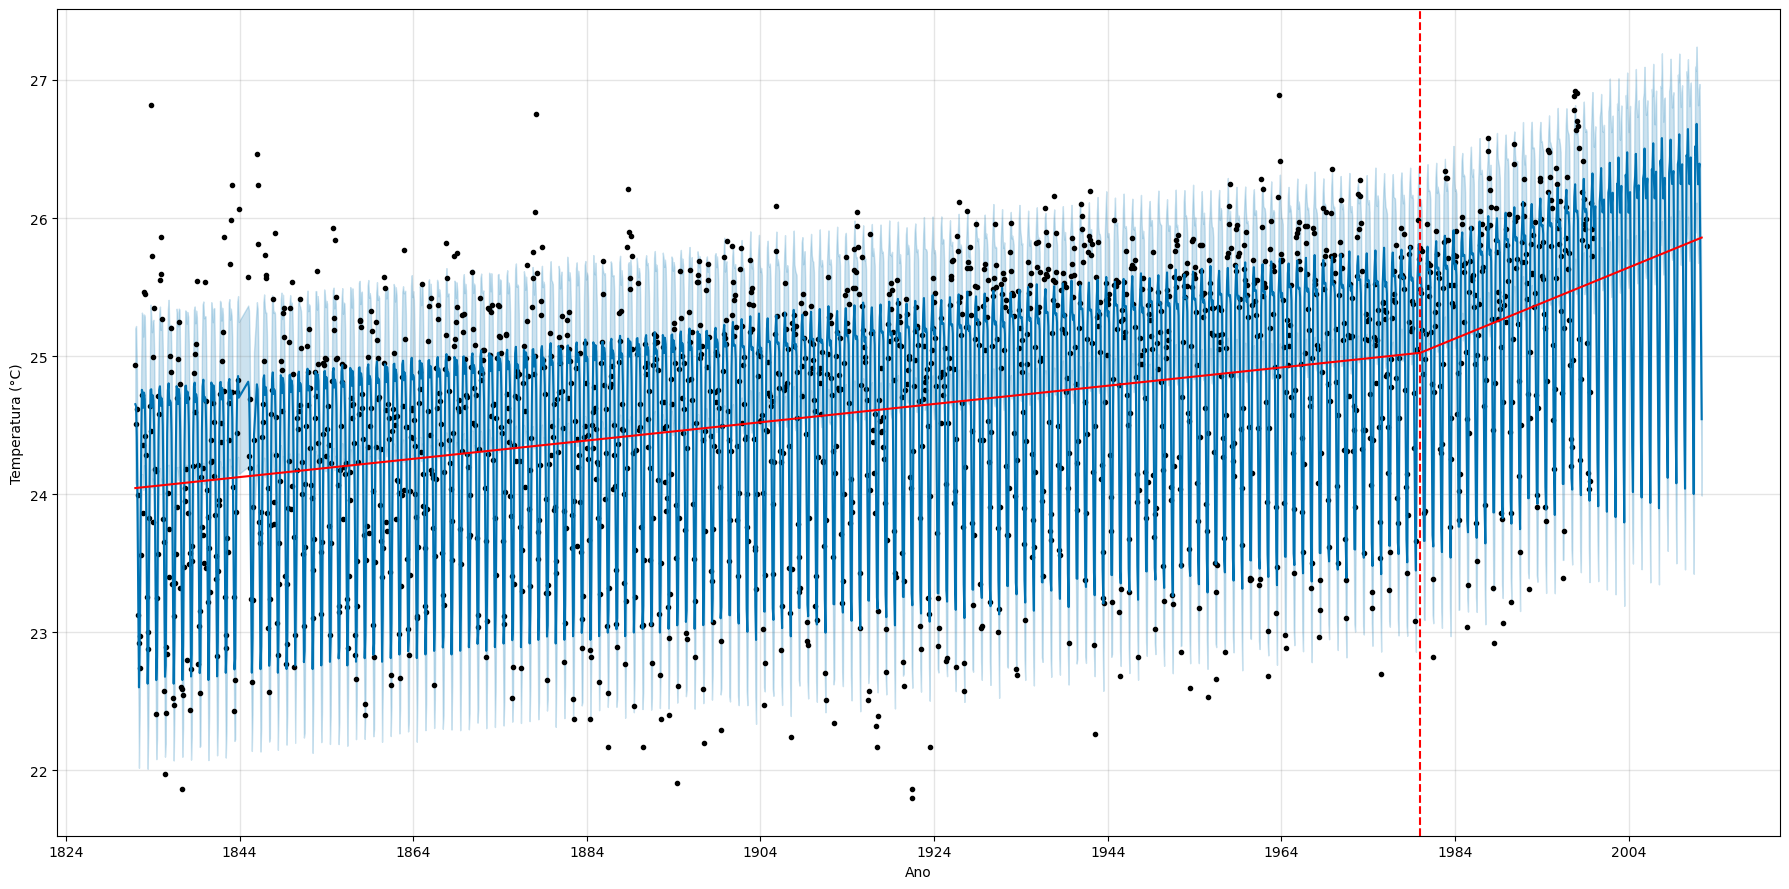

In [74]:
fig = model.plot(predicions, figsize=(18,9))
a = add_changepoints_to_plot(fig.gca(), model, predicions)
plt.xlabel('Ano')
plt.ylabel('Temperatura (°C)')

/opt/conda/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

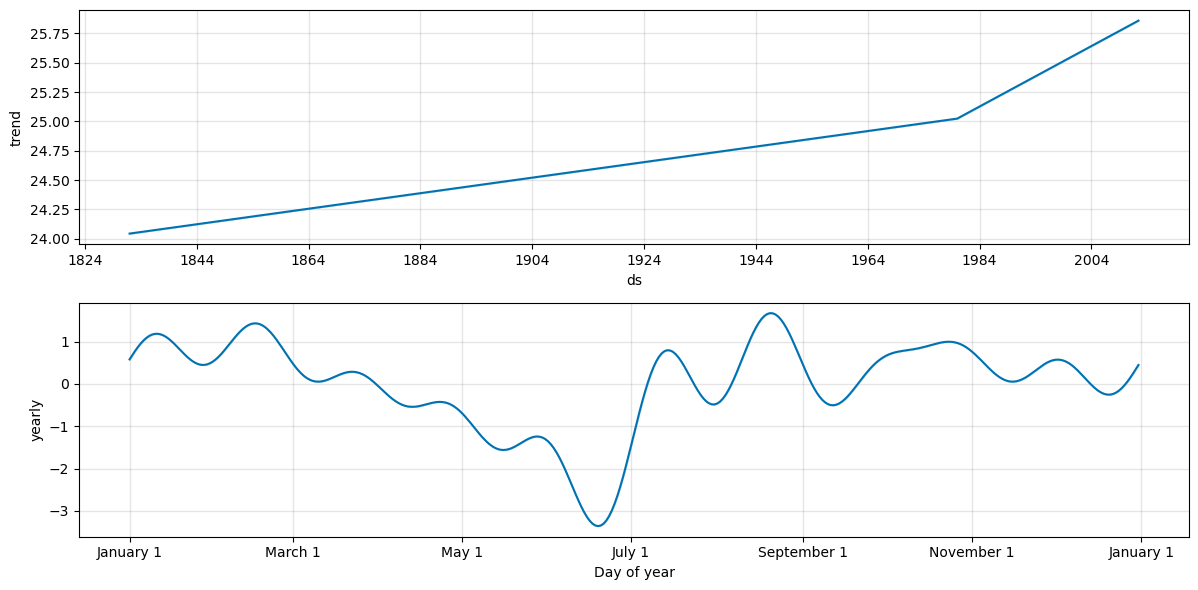

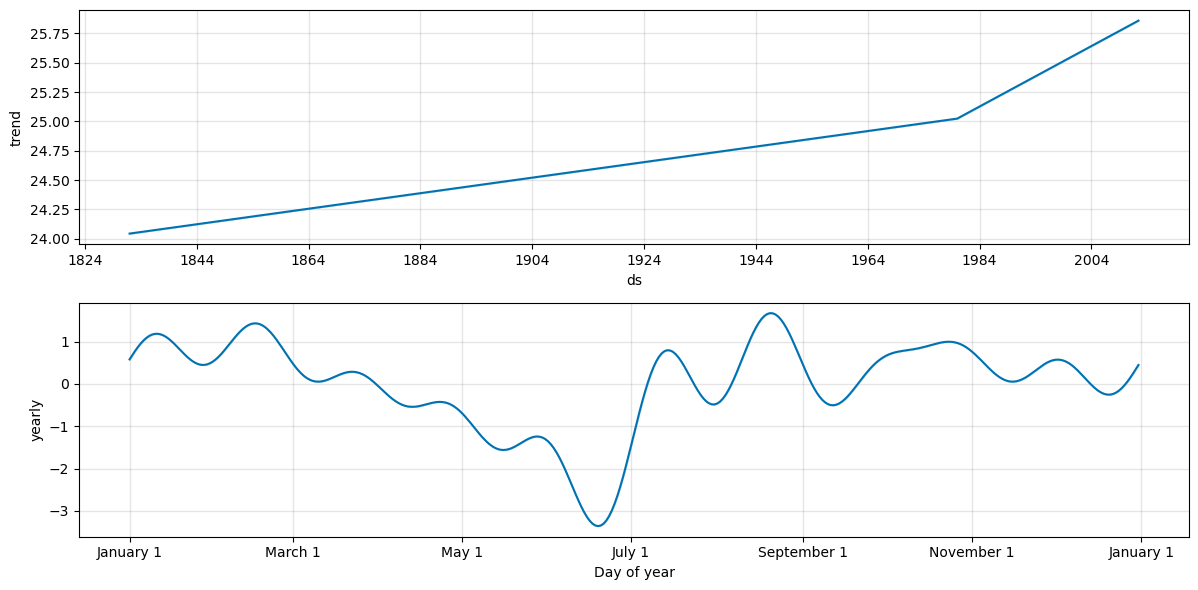

In [75]:
model.plot_components(predicions, figsize=(12, 6))